In [84]:
import json
import pandas as pd

# Read the JSON file
# with open("results/experiment_results.json", "r") as f:
#     data = pd.read_json(f)

import glob
import os

# Get all task result files
task_files = glob.glob("results/*--*/task_result.json")

# Read each file into a list of dictionaries


In [85]:
results = []
for file in task_files:
    with open(file, "r") as f:
        results.append(json.load(f))

# Create DataFrame
data = pd.DataFrame({"all_tasks": results})

In [86]:
all_tasks = pd.DataFrame(list(data['all_tasks']))
# all_tasks.head(3)
len(all_tasks)

590

In [87]:
# exclude impossible tasks
import json


with open("impossible-tasks.json", "r") as f:
    impossible_tasks = set(json.load(f))

all_tasks = all_tasks[~all_tasks["task_id"].isin(impossible_tasks)]
# all_tasks["group"] = all_tasks["task_id"].str.split("--").str[0]
len(all_tasks)

586

In [88]:
all_tasks["group"] = all_tasks["task_id"].str.split("--").str[0]
all_tasks["group"].value_counts()

group
Wolfram Alpha           46
Cambridge Dictionary    43
ArXiv                   42
ESPN                    40
GitHub                  40
Booking                 40
Google Search           40
Coursera                40
Allrecipes              39
Google Flights          39
Amazon                  38
Google Map              36
Huggingface             35
BBC News                35
Apple                   33
Name: count, dtype: int64

<Axes: >

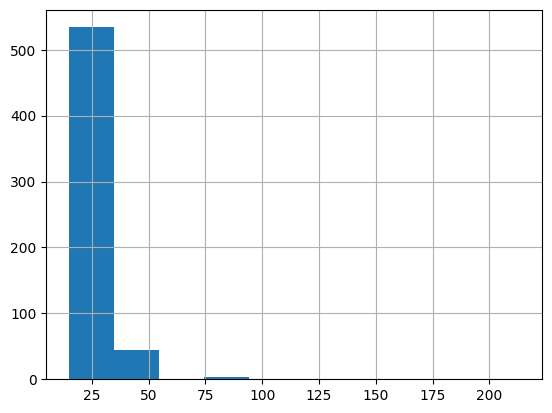

In [89]:
# average duration of tasks, average duration per step
# all_tasks["duration_seconds"].mean(), all_tasks["duration_seconds"].mean() / all_tasks["num_steps"].mean()

# histogram of duration PER STEP
(all_tasks["duration_seconds"] / all_tasks["num_steps"]).hist()

## Impossible tasks

Some tasks are impossible to solve. For Apple doesn't show prices for certain products in the dataset, there are no recipes for chocolate chip cookies etc.

A lot of tasks have dates in the past (kookings, flights), so we just changed the years from 2023 to 2024 or 2024 to 2025 respectively.

Here is a full list of impossible tasks:

In [94]:
impossible_tasks

{'Allrecipes--16',
 'Allrecipes--19',
 'Allrecipes--23',
 'Allrecipes--3',
 'Allrecipes--30',
 'Allrecipes--7',
 'Amazon--16',
 'Amazon--19',
 'Amazon--4',
 'Apple--1',
 'Apple--14',
 'Apple--16',
 'Apple--2',
 'Apple--20',
 'Apple--37',
 'Apple--41',
 'Apple--42',
 'Apple--7',
 'Apple--9',
 'ArXiv--11',
 'BBC News--14',
 'BBC News--16',
 'BBC News--18',
 'BBC News--2',
 'BBC News--21',
 'BBC News--33',
 'BBC News--37',
 'Booking--11',
 'Booking--13',
 'Booking--14',
 'Booking--6',
 'Coursera--17',
 'Coursera--28',
 'ESPN--19',
 'ESPN--2',
 'ESPN--21',
 'ESPN--26',
 'GitHub--22',
 'Google Flights--0',
 'Google Flights--20',
 'Google Flights--7',
 'Google Map--13',
 'Google Map--18',
 'Google Map--26',
 'Google Search--15',
 'Google Search--16',
 'Google Search--22',
 'Huggingface--1',
 'Huggingface--10',
 'Huggingface--20',
 'Huggingface--21',
 'Huggingface--22',
 'Huggingface--23',
 'Huggingface--32',
 'Huggingface--6'}

### Why tasks fail?

As you can see, most of the tasks fail because the model just can't figure out what to do. WHY?

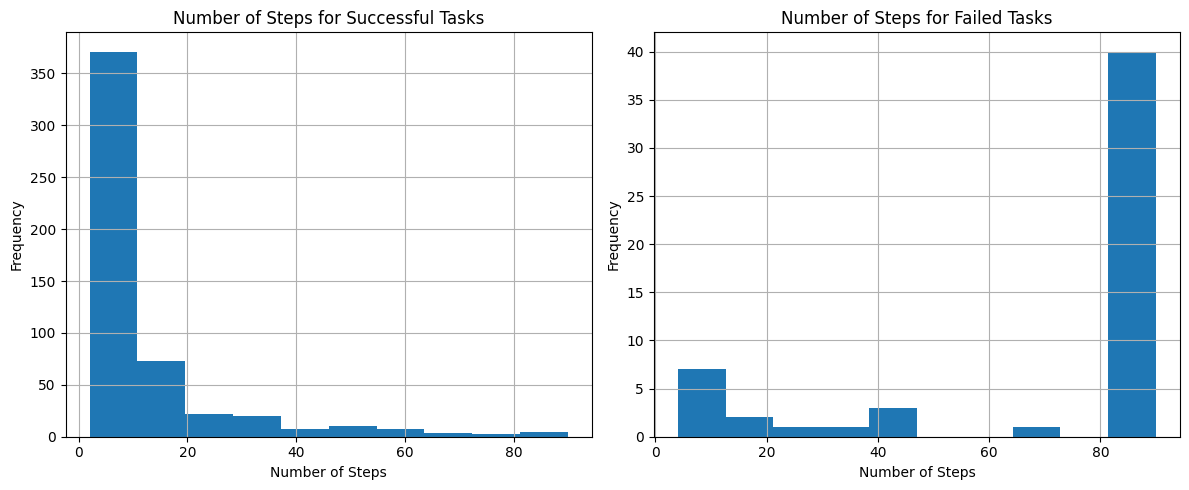

In [91]:
import matplotlib.pyplot as plt

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot histogram for successful tasks
successful_tasks = all_tasks[all_tasks["success"] == 'success']
successful_tasks["num_steps"].hist(ax=ax1)
ax1.set_title("Number of Steps for Successful Tasks")
ax1.set_xlabel("Number of Steps")
ax1.set_ylabel("Frequency")

# Plot histogram for failed tasks
failed_tasks = all_tasks[all_tasks["success"] == 'failed']
failed_tasks["num_steps"].hist(ax=ax2)
ax2.set_title("Number of Steps for Failed Tasks") 
ax2.set_xlabel("Number of Steps")
ax2.set_ylabel("Frequency")

plt.tight_layout()

In [92]:
all_tasks["success"].value_counts(normalize=True)

success
success    0.890785
failed     0.093857
unknown    0.015358
Name: proportion, dtype: float64

In [93]:
# percentage of tasks failed, unknown and success per each group (the thing before the -- in each task_id)
# Create group column if it doesn't exist
all_tasks["group"] = all_tasks["task_id"].str.split("--").str[0]

# Calculate percentage of each success status per group
# Calculate success percentages by group
success_by_group = all_tasks.groupby("group")["success"].value_counts(normalize=True).unstack().fillna(0)
success_by_group = success_by_group.round(2)

# Calculate average steps per group
avg_steps = all_tasks.groupby("group")["num_steps"].mean().round(1)
success_by_group["avg_steps"] = avg_steps

# Calculate number of tasks per group
num_tasks = all_tasks.groupby("group").size()
success_by_group["num_tasks"] = num_tasks

# Sort by success rate
# success_by_group.sort_values("group", ascending=True)
success_by_group.sort_values("success", ascending=False)

success,failed,success,unknown,avg_steps,num_tasks
group,,,,,
Huggingface,0.00,1.00,0.00,9.7,35
Google Flights,0.05,0.95,0.00,36.2,39
Amazon,0.08,0.92,0.00,14.7,38
GitHub,0.08,0.92,0.00,15.9,40
Apple,0.06,0.91,0.03,12.5,33
BBC News,0.09,0.91,0.00,18.2,35
Cambridge Dictionary,0.09,0.91,0.00,16.7,43
Allrecipes,0.08,0.90,0.03,18.3,39
Coursera,0.10,0.90,0.00,8.5,40
